In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
# Import time module
import time
# Import the requests library
import requests

# Import the citipy module to determine city based on latitude and longitude
from citipy import citipy
# Import date-time-module from the datetime library
from datetime import datetime

# Import the API key
from config import weather_api_key
# Import the Google Maps API key
from config import g_key

In [ ]:
# Set up our API url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list (otherwise it will be lost in memory)
coordinates = list(lat_lngs)

In [4]:
# using the tuple() from coordinates, locate the nearest city name, country code 
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

rikitea pf
bastia fr
asau tv
dingle ie
qaanaaq gl
monrovia lr
tura ru
duz tn
bengkulu id
solano co
constitucion mx
taolanaro mg
vaitupu wf
qostanay kz
superior us
selikhino ru
asau tv
punta arenas cl
kenai us
ushuaia ar
dikson ru
kaitangata nz
rikitea pf
codrington ag
kangaatsiaq gl
kapaa us
mataura pf
biak id
mormugao in
qaqortoq gl
emerald au
illoqqortoormiut gl
flinders au
mount isa au
atuona pf
wanaka nz
shimoda jp
mabaruma gy
cidreira br
esperance au
ajdabiya ly
ostrovnoy ru
busselton au
burnie au
bluff nz
atuona pf
roald no
yellowknife ca
tasiilaq gl
taltal cl
vaitupu wf
ushuaia ar
taolanaro mg
new norfolk au
butaritari ki
ilulissat gl
imbituba br
saldanha za
vaini to
bluff nz
ostrovnoy ru
umm lajj sa
rakaia nz
vaini to
cape town za
puerto ayora ec
constitucion mx
rikitea pf
we nc
bambous virieux mu
esperance au
krasnoshchekovo ru
sentyabrskiy ru
mataura pf
altagracia de orituco ve
santander es
saskylakh ru
coquimbo cl
souillac mu
nantucket us
port blair in
ushuaia ar
san andres 

cape town za
gravdal no
souillac mu
new norfolk au
rikitea pf
tasiilaq gl
hilo us
hamilton bm
busselton au
new norfolk au
butaritari ki
airai pw
pemba mz
hilo us
konstantinovskiy ru
punta arenas cl
east london za
castro cl
chuy uy
miyako jp
cape town za
iqaluit ca
kattivakkam in
punta arenas cl
arraial do cabo br
vila franca do campo pt
louisbourg ca
bluff nz
atuona pf
kamaishi jp
hermanus za
kosino ru
bilibino ru
rikitea pf
mar del plata ar
kota belud my
airai pw
goundam ml
upernavik gl
punta arenas cl
hithadhoo mv
pisco pe
bonavista ca
atuona pf
busselton au
vaini to
east london za
la cruz mx
ushuaia ar
belushya guba ru
kavieng pg
provideniya ru
fukue jp
illoqqortoormiut gl
rikitea pf
elko us
amderma ru
kruisfontein za
lulea se
san quintin mx
punta arenas cl
longyearbyen sj
skagastrond is
ushuaia ar
mulchen cl
vila velha br
cabo san lucas mx
progreso mx
pangkalanbuun id
nishihara jp
illoqqortoormiut gl
cabo san lucas mx
barentsburg sj
makakilo city us
kaitangata nz
mar del plata ar
a

bredasdorp za
busselton au
bambous virieux mu
jamestown sh
rikitea pf
tuktoyaktuk ca
milingimbi au
xining cn
peruibe br
baracoa cu
aklavik ca
punta arenas cl
vaini to
victoria sc
hobart au
vestmanna fo
hovd mn
nalut ly
rio grande br
ushuaia ar
hermanus za
mahadday weyne so
jamestown sh
busselton au
illoqqortoormiut gl
jamestown sh
airai pw
yeniseysk ru
cozumel mx
sedelnikovo ru
hermanus za
port elizabeth za
salyan az
bluff nz
punta arenas cl
gouyave gd
bredasdorp za
gigmoto ph
hithadhoo mv
port alfred za
hobart au
cidreira br
victoria sc
arlit ne
sorland no
leningradskiy ru
amderma ru
upernavik gl
udachnyy ru
jamestown sh
saskylakh ru
punta arenas cl
port alfred za
belushya guba ru
vao nc
sitka us
barrow us
cape town za
tommot ru
illoqqortoormiut gl
kadaya ru
soe id
ha tinh vn
eureka us
cabo san lucas mx
santa rosa ar
puerto ayora ec
nikolskoye ru
qaanaaq gl
busselton au
new norfolk au
boa vista br
vaini to
talnakh ru
umzimvubu za
rikitea pf
bluff nz
albany au
majene id
emba kz
talnakh

In [5]:
# Refactor the above code to create a list to hold the cities 
cities = []
# Identify the nearest cities for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
# If the city is unique, then add it to the city list
    if city not in cities:
        cities.append(city)
# When complete print out how many cities were entered from the 1500 coordinates
len(cities)
cities

['rikitea',
 'bastia',
 'asau',
 'dingle',
 'qaanaaq',
 'monrovia',
 'tura',
 'duz',
 'bengkulu',
 'solano',
 'constitucion',
 'taolanaro',
 'vaitupu',
 'qostanay',
 'superior',
 'selikhino',
 'punta arenas',
 'kenai',
 'ushuaia',
 'dikson',
 'kaitangata',
 'codrington',
 'kangaatsiaq',
 'kapaa',
 'mataura',
 'biak',
 'mormugao',
 'qaqortoq',
 'emerald',
 'illoqqortoormiut',
 'flinders',
 'mount isa',
 'atuona',
 'wanaka',
 'shimoda',
 'mabaruma',
 'cidreira',
 'esperance',
 'ajdabiya',
 'ostrovnoy',
 'busselton',
 'burnie',
 'bluff',
 'roald',
 'yellowknife',
 'tasiilaq',
 'taltal',
 'new norfolk',
 'butaritari',
 'ilulissat',
 'imbituba',
 'saldanha',
 'vaini',
 'umm lajj',
 'rakaia',
 'cape town',
 'puerto ayora',
 'we',
 'bambous virieux',
 'krasnoshchekovo',
 'sentyabrskiy',
 'altagracia de orituco',
 'santander',
 'saskylakh',
 'coquimbo',
 'souillac',
 'nantucket',
 'port blair',
 'san andres',
 'barrow',
 'jamestown',
 'hilo',
 'arraial do cabo',
 'lufilufi',
 'henties bay',
 '

In [6]:
city.title()

'Shieli'

In [7]:
# Set up our API url
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + '&q=' + city
#city_weather = requests.get(city_url)
#city_weather

# Get the text of the 'Get' in JSON
#city_weather.json()

# Write code to respond to response code before even handling data from the 'Get'
#city_url = url + '&q=' + 'Boston'
#city_weather = requests.get(city_url)
#if city_weather.status_code == 200:
#    print(f'City Weather found.')
#else:
#    print(f'City Weather Not found.')

# Get the JSON data
#boston_data = city_weather.json()
#boston_data['name']
#boston_date['dt']
#boston_data['sys']['country']
#boston_data['coord']['lon']
#boston_data['coord']['lat']
#boston_data['main']['temp_max']
#boston_data['main']['temp_min']
#boston_data['main']['humidity']
#boston_data['clouds']['all']
#boston_data['wind']['speed']

# get the date from the JSON file
#date = boston_data['dt']
# Convert the UTC date to a date format with year, month, day, hours
#datetime.utcfromtimestamp(date)

# Convert the date to python string
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [8]:
# Set up our API url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print('Beginning of Data Retrieval')
print('------------------------------------')

# Create counters
record_count = 1
set_count = 1

Beginning of Data Retrieval
------------------------------------


In [10]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    city_url = url + '&q=' + city
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    
    # Log the URL, record, set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bastia
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | dingle
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | duz
City not found. Skipping...
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | solano
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | qostanay
Processing Record 15 of Set 1 | superior
Processing Record 16 of Set 1 | selikhino
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kenai
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | codrington
Processing Record 23 of Set 1 | kanga

Processing Record 37 of Set 4 | chingirlau
Processing Record 38 of Set 4 | bonavista
Processing Record 39 of Set 4 | anshun
Processing Record 40 of Set 4 | makakilo city
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | corinto
Processing Record 43 of Set 4 | cururupu
Processing Record 44 of Set 4 | millinocket
Processing Record 45 of Set 4 | salas
Processing Record 46 of Set 4 | aflu
City not found. Skipping...
Processing Record 47 of Set 4 | tunduru
City not found. Skipping...
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | zheleznodorozhnyy
Processing Record 50 of Set 4 | krasnoselkup
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | abu dhabi
Processing Record 3 of Set 5 | tottori
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | the valley
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | sandwick
Processing Record 8 of Set 5 | stornoway
Processing R

Processing Record 27 of Set 8 | chinhoyi
Processing Record 28 of Set 8 | rawson
Processing Record 29 of Set 8 | ixtapa
Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | koumac
Processing Record 32 of Set 8 | tahta
Processing Record 33 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 8 | hirado
Processing Record 35 of Set 8 | marsa matruh
Processing Record 36 of Set 8 | kjopsvik
Processing Record 37 of Set 8 | tawkar
City not found. Skipping...
Processing Record 38 of Set 8 | novikovo
Processing Record 39 of Set 8 | coihaique
Processing Record 40 of Set 8 | piacabucu
Processing Record 41 of Set 8 | sibu
Processing Record 42 of Set 8 | gouyave
Processing Record 43 of Set 8 | crotone
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | la palma
Processing Record 46 of Set 8 | garowe
Processing Record 47 of Set 8 | tazovskiy
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | aloleng
Processing Record

In [11]:
# After collecting all our data, 
# we can tally the number of cities in the city_data array of dictionaries using the len() function.
len(city_data)

519

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.08,64,6,17.31,PF,2021-10-03 15:57:14
1,Bastia,42.6667,9.3333,75.00,78,20,17.27,FR,2021-10-03 15:57:14
2,Asau,46.4333,26.4000,60.40,67,74,2.04,RO,2021-10-03 15:57:15
3,Dingle,10.9995,122.6711,76.21,94,100,5.68,PH,2021-10-03 15:57:15
4,Qaanaaq,77.4840,-69.3632,31.89,97,100,10.04,GL,2021-10-03 15:57:15
5,Monrovia,6.3005,-10.7969,87.57,77,85,5.77,LR,2021-10-03 15:57:16
6,Tura,25.5198,90.2201,72.18,97,18,4.21,IN,2021-10-03 15:57:16
7,Bengkulu,-3.8004,102.2655,76.64,91,89,6.71,ID,2021-10-03 15:57:17
8,Solano,38.2333,-121.9511,77.02,44,4,3.53,US,2021-10-03 15:57:17
9,Constitucion,-35.3333,-72.4167,58.19,48,0,16.84,CL,2021-10-03 15:57:17


In [13]:
# Rearrange the columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-10-03 15:57:14,-23.1203,-134.9692,73.08,64,6,17.31
1,Bastia,FR,2021-10-03 15:57:14,42.6667,9.3333,75.00,78,20,17.27
2,Asau,RO,2021-10-03 15:57:15,46.4333,26.4000,60.40,67,74,2.04
3,Dingle,PH,2021-10-03 15:57:15,10.9995,122.6711,76.21,94,100,5.68
4,Qaanaaq,GL,2021-10-03 15:57:15,77.4840,-69.3632,31.89,97,100,10.04


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

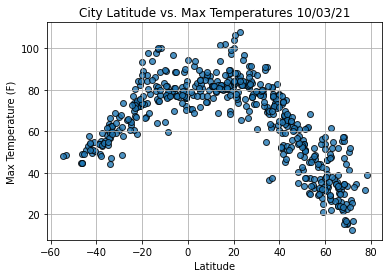

In [16]:
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the additional graph properties
plt.title(f'City Latitude vs. Max Temperatures ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Latitude_MaxTemp.png')

# Show Plot
plt.show()

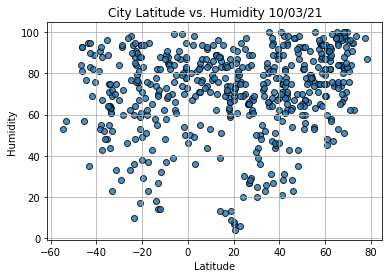

In [17]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the additional graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Latitude_Humidity.png')

# Show Plot
plt.show()

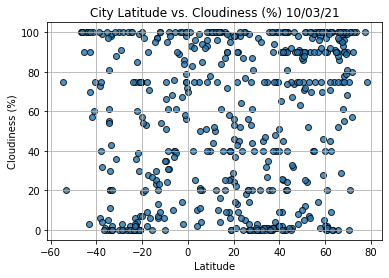

In [18]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the additional graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Latitude_Cloudiness.png')

# Show Plot
plt.show()

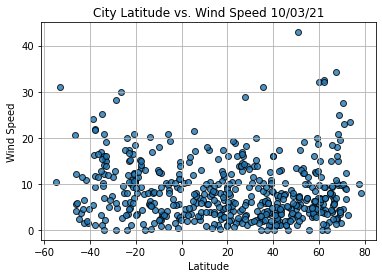

In [19]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the additional graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Latitude_Wind_Speed.png')

# Show Plot
plt.show()

In [20]:
# Create a function to plot the linear regression equation for each of our weather
# charts of Latitudes vs Max Temperature, Humidity, Cloudiness and Wind Speed
# This will plot a regression line with equation on the scatter plot
# Import linregress
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y_values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Create the scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    # Add additional chart features
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [21]:
# Create DataFrames for the northern and southern hemisphere's
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

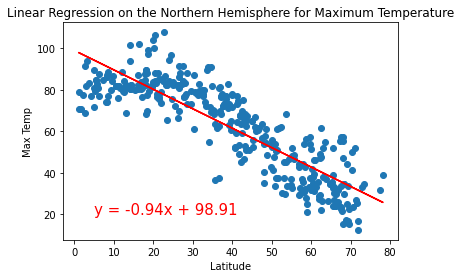

<Figure size 432x288 with 0 Axes>

In [22]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call Linear Regression Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,20))
# Save the figure
plt.savefig('weather_data/NH_Latitude_MaxTemp_LR.png')

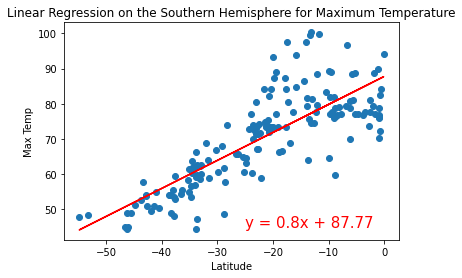

<Figure size 432x288 with 0 Axes>

In [23]:
# Perform linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call Linear Regression function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,45))
# Save the figure
plt.savefig('weather_data/SH_Latitude_MaxTemp_LR.png')

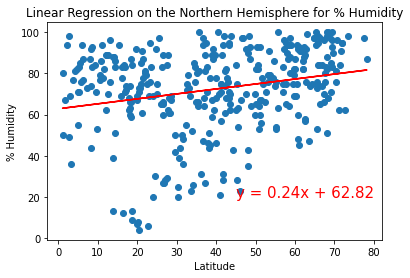

<Figure size 432x288 with 0 Axes>

In [24]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call Linear Regression Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,20))
# Save the figure
plt.savefig('weather_data/NH_Latitude_Humidity_LR.png')

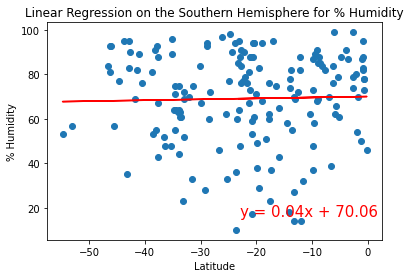

<Figure size 432x288 with 0 Axes>

In [25]:
# Perform linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call Linear Regression function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-23,16))
# Save the figure
plt.savefig('weather_data/SH_Latitude_Humidity_LR.png')

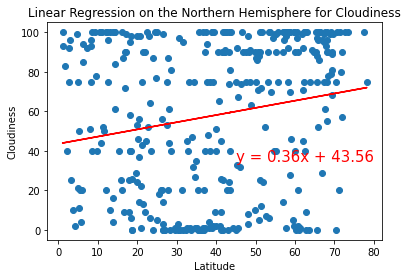

<Figure size 432x288 with 0 Axes>

In [26]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call Linear Regression Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(45,35))
# Save the figure
plt.savefig('weather_data/NH_Latitude_Cloudiness_LR.png')

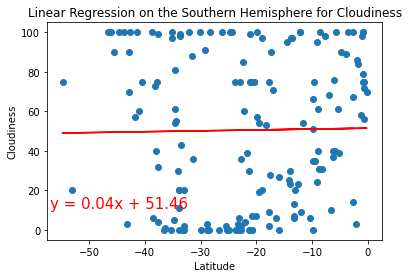

<Figure size 432x288 with 0 Axes>

In [27]:
# Perform linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call Linear Regression function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(-57,11))
# Save the figure
plt.savefig('weather_data/SH_Latitude_Cloudiness_LR.png')

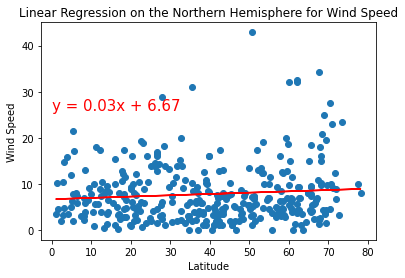

<Figure size 432x288 with 0 Axes>

In [28]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call Linear Regression Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,26))
# Save the figure
plt.savefig('weather_data/NH_Latitude_Wind_Speed_LR.png')

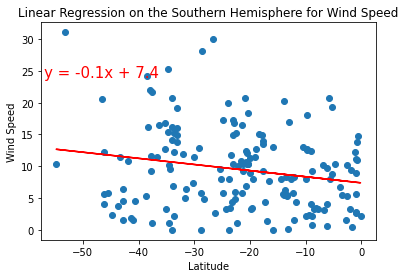

<Figure size 432x288 with 0 Axes>

In [29]:
# Perform linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call Linear Regression function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-57,24))
# Save the figure
plt.savefig('weather_data/SH_Latitude_Wind_Speed_LR.png')